# POSTTEST 5 KB 2109106124 Gusti Dimas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score, mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("cleaned_all_phones.csv")
df.drop(df.index[6001:462417], inplace=True)

In [3]:
df.head(5)

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [4]:
X = df[['battery', 'ram(GB)']]
y = df['battery_type']

In [5]:
y = np.where(y == 'Li-Ion', 1, -1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
svm = SVC(kernel="rbf")

In [8]:
svm.fit(X_train, y_train)

SVC()

In [9]:
y_pred = svm.predict(X_test)

In [10]:
support_vectors = svm.support_vectors_
support_vector_indices = np.where(np.isin(X_train, support_vectors).all(axis=1))

/Users/dimasgusti/Documents/Kuliah/Semester 5/Prak KB/venv_c1-21/Gusti_124/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


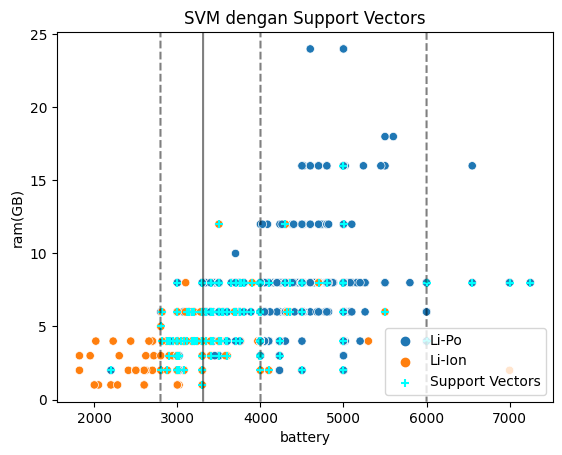

In [11]:
sns.scatterplot(x='battery', y='ram(GB)', hue='battery_type', data=df)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=40, color='cyan', marker='+', label='Support Vectors')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
linestyles=['--', '-', '--'])
plt.xlabel('battery')
plt.ylabel('ram(GB)')
plt.legend(loc='lower right')
plt.title('SVM dengan Support Vectors')
plt.show()

In [12]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

          -1       0.91      0.96      0.93       382
           1       0.69      0.53      0.60        72

    accuracy                           0.89       454
   macro avg       0.80      0.74      0.77       454
weighted avg       0.88      0.89      0.88       454



In [13]:
X, y = df[['battery']], df['ram(GB)']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [15]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

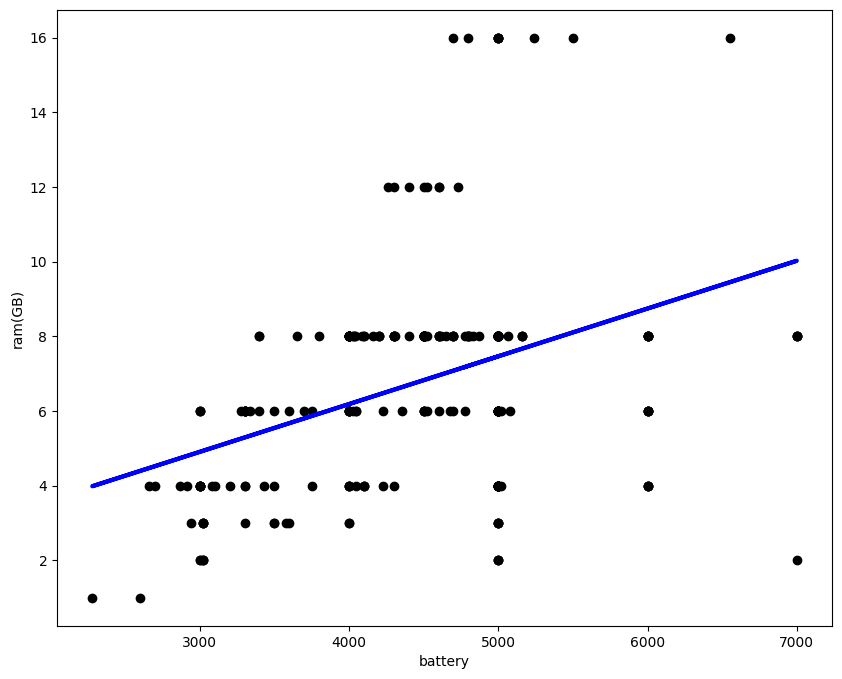

In [16]:
plt.figure(figsize=(10,8))
plt.plot(X_test, y_pred, c='blue', linewidth=3)
plt.scatter(X_test, y_test, c='Black')
plt.xlabel("battery")
plt.ylabel("ram(GB)")
plt.show()

In [17]:
svm = SVC(kernel='linear')
svm.fit(X, y)

SVC(kernel='linear')

In [18]:
y_pred = svm.predict(X_test)
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared :", r2_score(y_test, y_pred))

MAE : 1.6105610561056105
MSE : 6.858085808580858
RMSE : 2.6187947244067944
R-Squared : 0.06323701382751756


In [19]:
X = df[["battery", "ram(GB)"]]
K = 2

In [20]:
kmeans = KMeans(n_clusters=K, n_init=10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10)

In [21]:
cluster_labels = kmeans.labels_
df["cluster"] = cluster_labels
centroids = kmeans.cluster_centers_

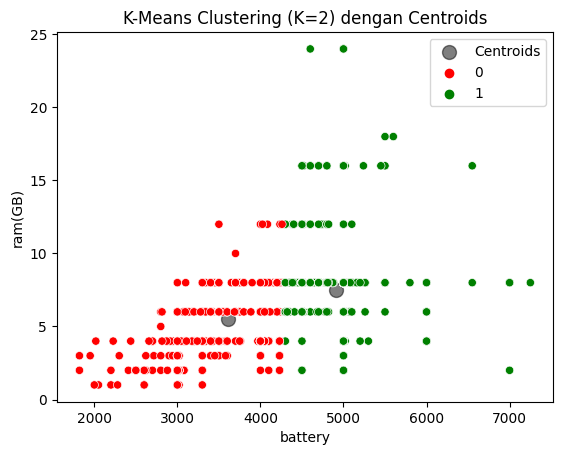

In [22]:
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='black', s=100, label='Centroids')
sns.scatterplot(data=df, x="battery", y="ram(GB)", hue="cluster", palette=["red", "green"])
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("battery")
plt.ylabel("ram(GB)")
plt.legend()
plt.show()

In [23]:
cross_tab = pd.crosstab(df["cluster"], df["brand"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

Cross-Tabulation:
brand    Apple  Google  Honor  Huawei  LG  Lenovo  OnePlus  Oppo  Realme  \
cluster                                                                    
0           19      11     56     108  65      26       10    88      25   
1            3       8     68      29  10      17       37   125     132   

brand    Samsung  Sony  Vivo  Xiaomi  
cluster                               
0             88    27    20      63  
1            118    10   148     201   



In [24]:
ari = adjusted_rand_score(df["brand"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

Adjusted Rand Index (ARI): 0.04


In [25]:
true_labels_num = df["brand"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

Normalized Mutual Information (NMI): 0.08


In [26]:
homogeneity = homogeneity_score(df["brand"], cluster_labels)
completeness = completeness_score(df["brand"], cluster_labels)
v_measure = v_measure_score(df["brand"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Homogeneity Score: 0.05
Completeness Score: 0.17
V-Measure Score: 0.08
